In [1]:
import numpy as np 
import pandas as pd 


In [2]:
df = pd.read_csv('full_data.csv')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_7176\1083520983.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_7176\1083520983.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_7176\1083520983.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_7176\1083520983.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_7176\1083520983.py:9: UserWarning: Matplotlib is currently using module

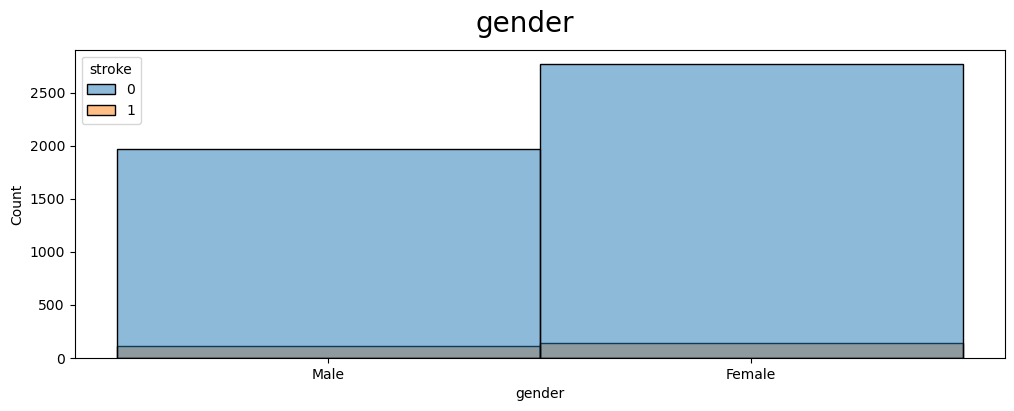

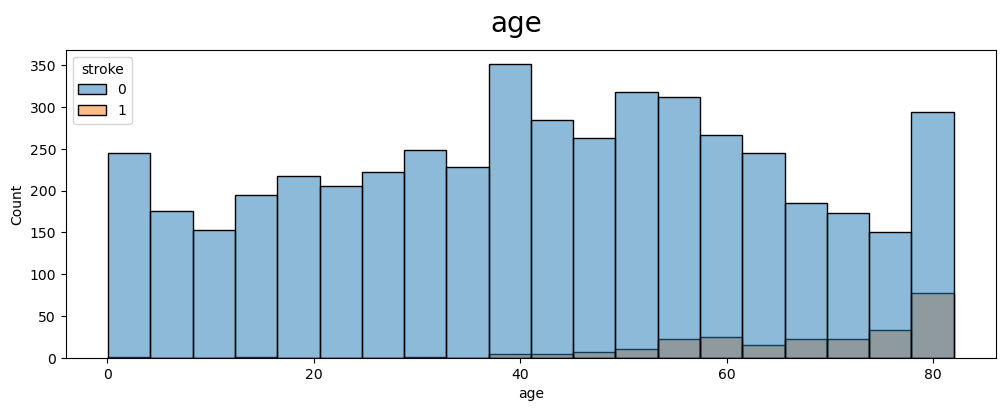

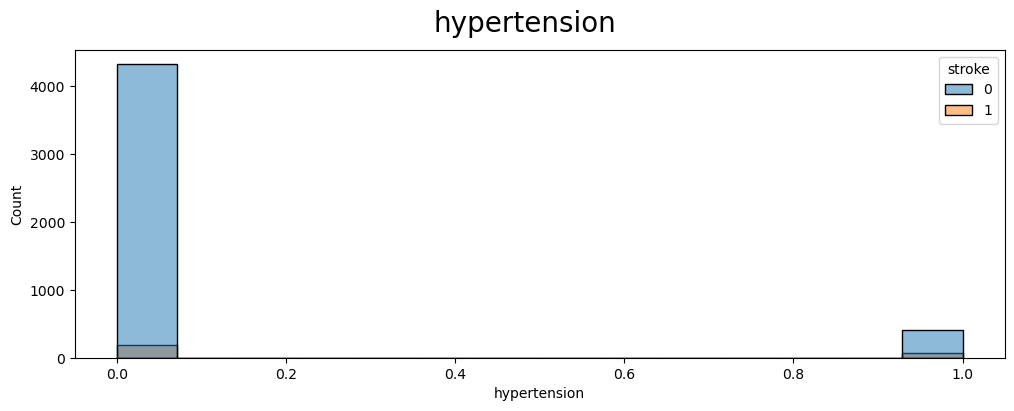

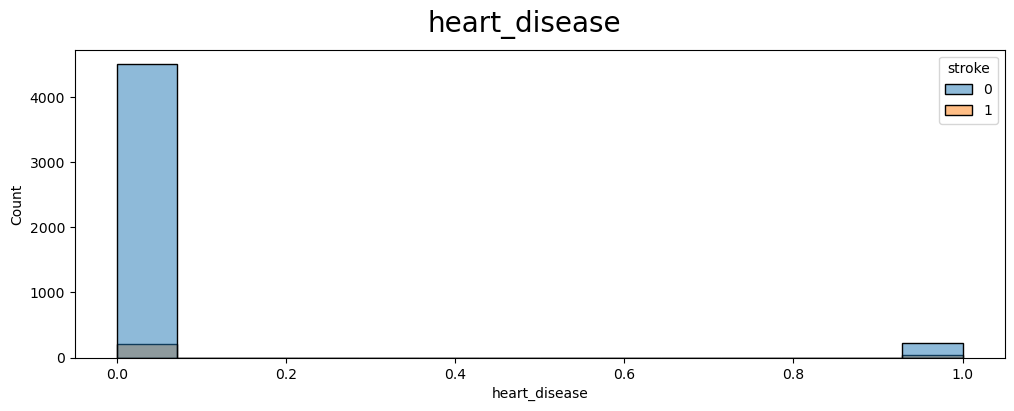

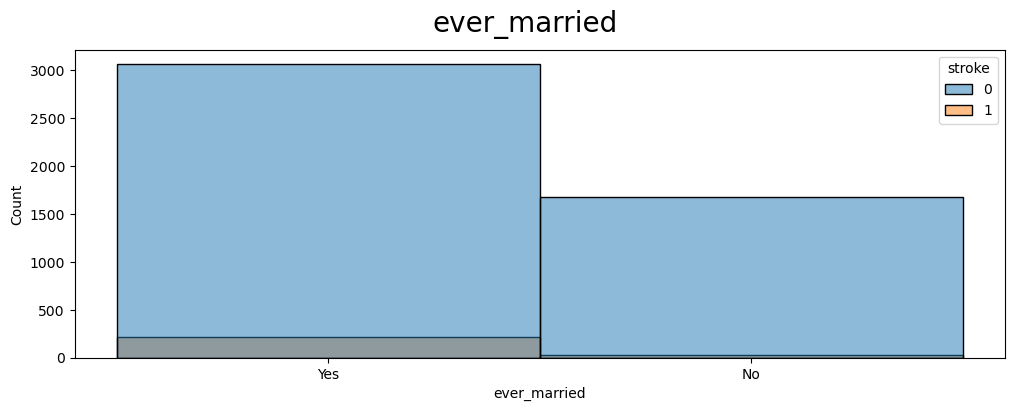

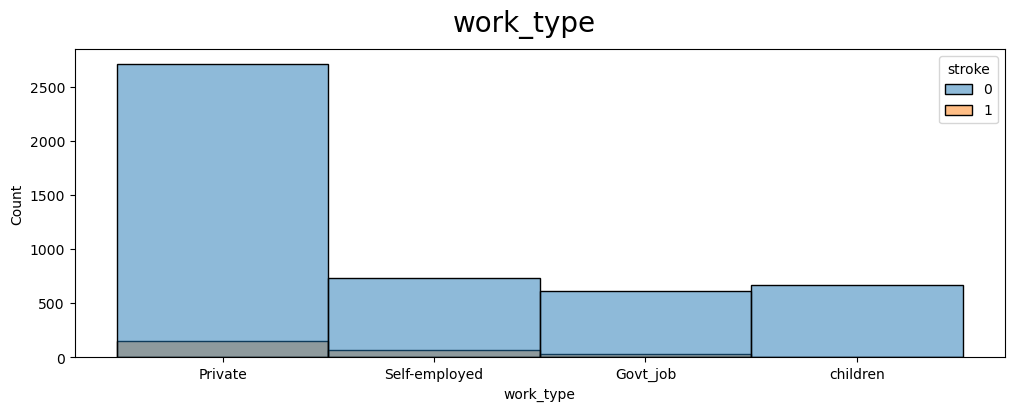

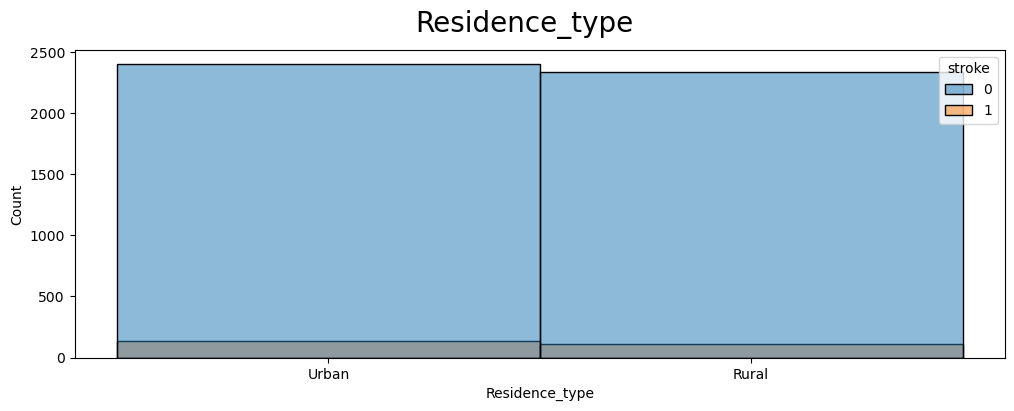

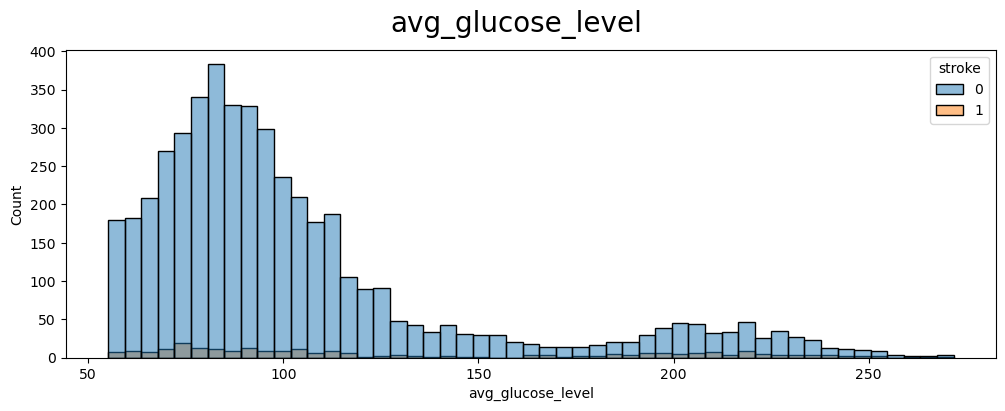

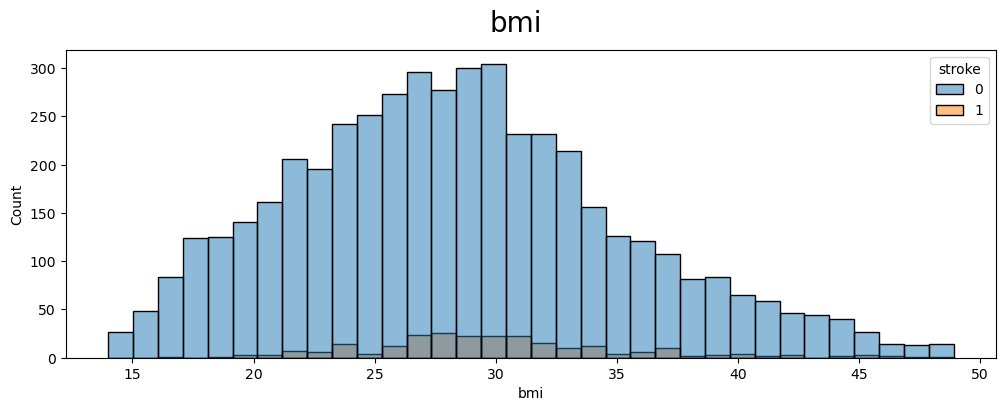

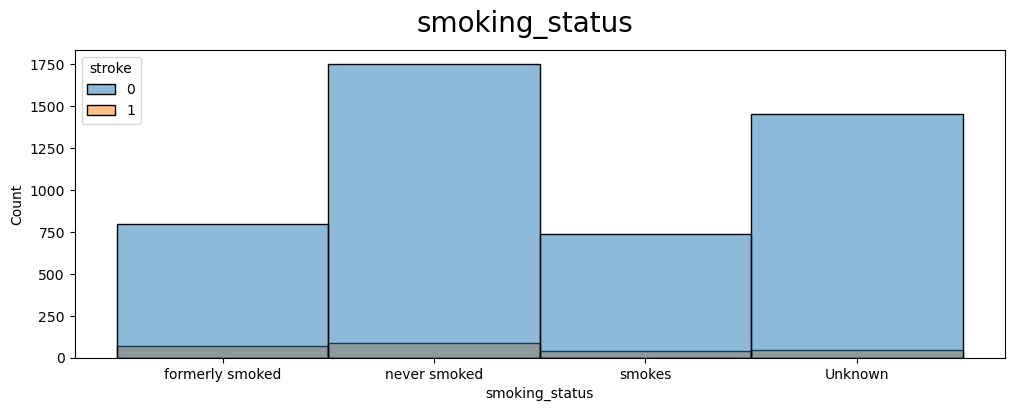

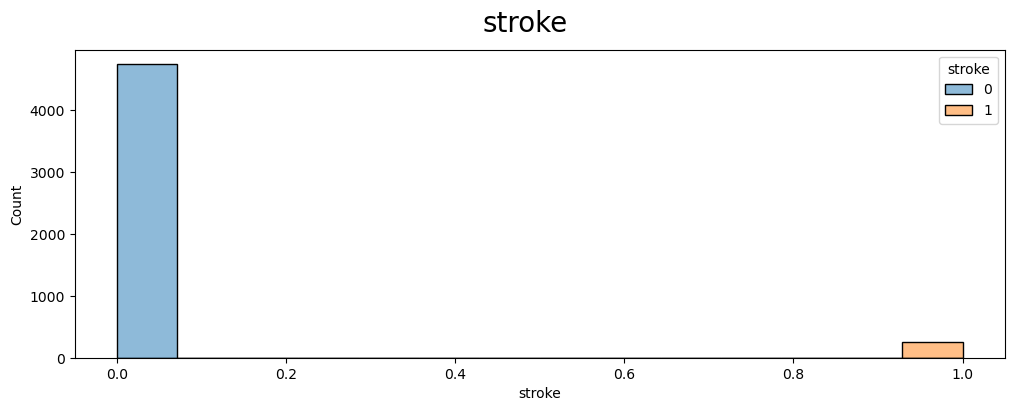

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

for i in list(df.columns):
    fig, ax = plt.subplots(1, figsize=(12,4))
    sns.histplot(data=df, x=i, hue='stroke')
    plt.suptitle(i, fontsize=20)
    fig.show()

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_7176\2655060044.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


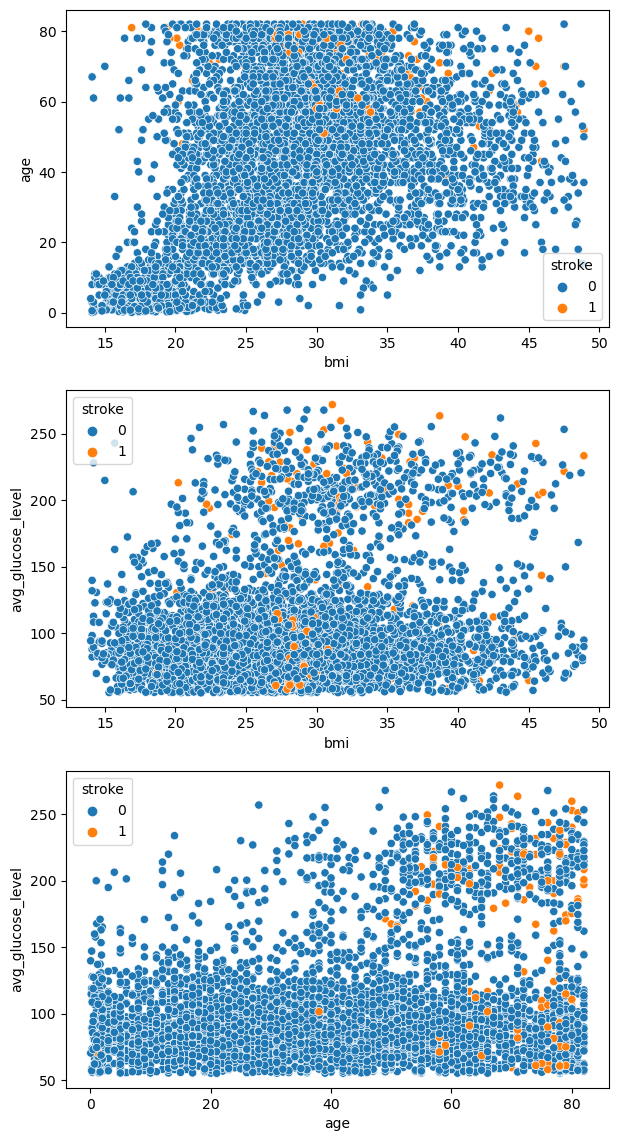

In [6]:
fig, ax = plt.subplots(nrows=3, figsize=(7,14))

sns.scatterplot(data=df, x='bmi', y='age', hue='stroke', ax=ax[0])
sns.scatterplot(data=df, x='bmi', y='avg_glucose_level', hue='stroke', ax=ax[1])
sns.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke', ax=ax[2])

fig.show()

In [7]:
df.select_dtypes(include = object).columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [8]:
print('Gender Types: ', df.gender.unique())
print('Ever Married Types: ', df.ever_married.unique())
print('Work Types: ', df.work_type.unique())
print('Residence Types: ', df.Residence_type.unique())
print('Smoking Status Types: ', df.smoking_status.unique())

Gender Types:  ['Male' 'Female']
Ever Married Types:  ['Yes' 'No']
Work Types:  ['Private' 'Self-employed' 'Govt_job' 'children']
Residence Types:  ['Urban' 'Rural']
Smoking Status Types:  ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [9]:
#change gender values to male=1 , female=0
gndr_col = pd.get_dummies(df["gender"])
gndr_col = gndr_col.drop(['Female'], axis=1)

#change ever_married values to Yes=1 , No=1
mrd_col = pd.get_dummies(df["ever_married"])
mrd_col = mrd_col.drop(['No'], axis=1)

#change residence_type values to urban=1 , rural=0
urbn_col = pd.get_dummies(df["Residence_type"])
urbn_col = urbn_col.drop(['Rural'], axis=1)

#concating new column and dateframe to build final dataset
df = pd.concat((df, gndr_col, mrd_col, urbn_col), axis=1)
df = df.drop(['gender', 'ever_married', 'Residence_type'], axis=1)
df = df.rename(columns={'Male': 'gender', 'Yes': 'ever_married'})
df

,age,hypertension,heart_disease,work_type,avg_glucose_level,bmi,smoking_status,stroke,gender,ever_married,Urban
0,67.0,0,1,Private,228.69,36.6,formerly smoked,1,1,1,1
1,80.0,0,1,Private,105.92,32.5,never smoked,1,1,1,0
2,49.0,0,0,Private,171.23,34.4,smokes,1,0,1,1
3,79.0,1,0,Self-employed,174.12,24.0,never smoked,1,0,1,0
4,81.0,0,0,Private,186.21,29.0,formerly smoked,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,Private,70.15,29.8,formerly smoked,0,1,0,0
4977,40.0,0,0,Private,191.15,31.1,smokes,0,1,1,1
4978,45.0,1,0,Govt_job,95.02,31.8,smokes,0,0,1,0
4979,40.0,0,0,Private,83.94,30.0,smokes,0,1,1,0


In [10]:
df = pd.get_dummies(df, drop_first=True)
df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender,ever_married,Urban,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,1,1,1,0,0,1,0,0
1,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,1,1,1,0,0,0,0,1
3,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,1,0
4,81.0,0,0,186.21,29.0,1,1,1,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,41.0,0,0,70.15,29.8,0,1,0,0,1,0,0,1,0,0
4977,40.0,0,0,191.15,31.1,0,1,1,1,1,0,0,0,0,1
4978,45.0,1,0,95.02,31.8,0,0,1,0,0,0,0,0,0,1
4979,40.0,0,0,83.94,30.0,0,1,1,0,1,0,0,0,0,1


In [11]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop(["stroke"], axis=1)
y = df['stroke']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, np.array(y), test_size=0.3, random_state=42)

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(random_state=42)
svm_search_space = {
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
    "C": list(np.random.random_sample((5,))),
    "degree": [2, 3, 4],
    'class_weight': ['balanced', None],
    "gamma": ['scale', 'auto'] + list(np.random.random_sample((4,)))
}

svm_GS = GridSearchCV(estimator = svm_model,
                      param_grid = svm_search_space,
                      scoring = ["accuracy", "f1"],
                      refit = "accuracy",
                      cv = 5,
                      n_jobs = -1,
                      verbose = 4)

svm_GS.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.34822349028550204, 0.28442789697035475,
                               0.08997132984660217, 0.8328967576421334,
                               0.6371877972111516],
                         'class_weight': ['balanced', None],
                         'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto', 0.5300013782922526,
                                   0.21223395043850124, 0.44214975628511144,
                                   0.7135406126172135],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='accuracy', scoring=['accuracy', 'f1'], verbose=4)

In [14]:
print(svm_GS.best_params_)
print(svm_GS.best_score_)

{'C': 0.28442789697035475, 'class_weight': None, 'degree': 4, 'gamma': 0.44214975628511144, 'kernel': 'poly'}
0.9515200223635475


In [15]:
from sklearn.metrics import classification_report

model_pred = svm_GS.predict(X_test)
svm_classifier_report = classification_report(y_test, model_pred , output_dict=True, zero_division=1)
svm_results = pd.DataFrame(svm_classifier_report).transpose()
svm_results

,precision,recall,f1-score,support
0,0.947826,1.000000,0.973214,1417.000000
1,1.000000,0.000000,0.000000,78.000000
accuracy,0.947826,0.947826,0.947826,0.947826
macro avg,0.973913,0.500000,0.486607,1495.000000
weighted avg,0.950548,0.947826,0.922438,1495.000000
